In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import load_digits

## Zad.

Narysuj dane MNIST wybierając dwie pierwsze współrzędne.

In [2]:
digits = load_digits()
# print(digits.DESCR)

print("digits.keys() =", digits.keys())
print("digits.images.shape =", digits.images.shape)
print("digits.data.shape =", digits.data.shape)
print("digits.target.shape =", digits.target.shape)

digits.keys() = dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
digits.images.shape = (1797, 8, 8)
digits.data.shape = (1797, 64)
digits.target.shape = (1797,)


In [3]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

In [4]:
digits.data[1]

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

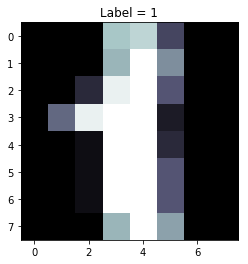

In [5]:
plt.imshow(digits.images[1], cmap=plt.cm.bone)
plt.title("Label = "+str(digits.target[1]))
plt.show()

## Zad.

Wykonaj algorytm k-means na danych iris z grupami $k=1,\ldots,50$ i narysuj wykres zależności miar

```python
metrics.homogeneity_score
metrics.completeness_score
metrics.v_measure_score
metrics.adjusted_rand_score
metrics.adjusted_mutual_info_score
```

od ilośi klastrów.

In [6]:
X = digits.data
y = digits.target

SSE_array = [None]
homogeneity_score_array = [None]
completeness_score_array = [None]
v_measure_score_array = [None]
adjusted_rand_score_array = [None]
adjusted_mutual_info_score_array = [None]
silhouette_score_array = [None]
    
for i in range(1,21):
    km = KMeans(n_clusters=i, n_init=10)
    y_km = km.fit_predict(X)
    SSE_array.append(km.inertia_)
    
    homogeneity_score_array.append(metrics.homogeneity_score(y, y_km))
    completeness_score_array.append(metrics.completeness_score(y, y_km))
    v_measure_score_array.append(metrics.v_measure_score(y, y_km))
    adjusted_rand_score_array.append(metrics.adjusted_rand_score(y, y_km))
    adjusted_mutual_info_score_array.append(metrics.adjusted_mutual_info_score(y,  y_km))
    


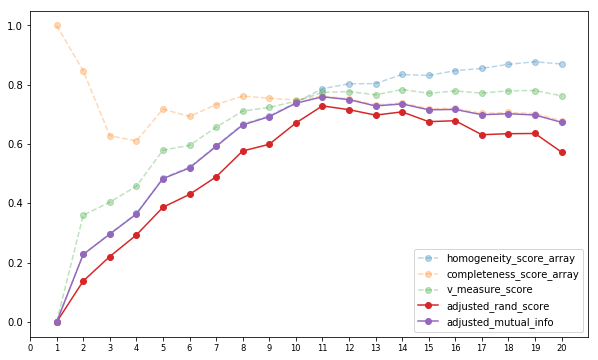

In [7]:
t=range(0,21)
plt.figure(figsize=(10,6));
# plt.plot(SSE_array)
plt.plot( homogeneity_score_array, "o--", label="homogeneity_score_array", alpha = 0.3)
plt.plot( completeness_score_array, "o--", label="completeness_score_array", alpha = 0.3)
plt.plot( v_measure_score_array, "o--", label="v_measure_score", alpha = 0.3)
plt.plot( adjusted_rand_score_array, "o-", label="adjusted_rand_score")
plt.plot( adjusted_mutual_info_score_array, "o-", label="adjusted_mutual_info")
plt.xlim(0,21)
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()

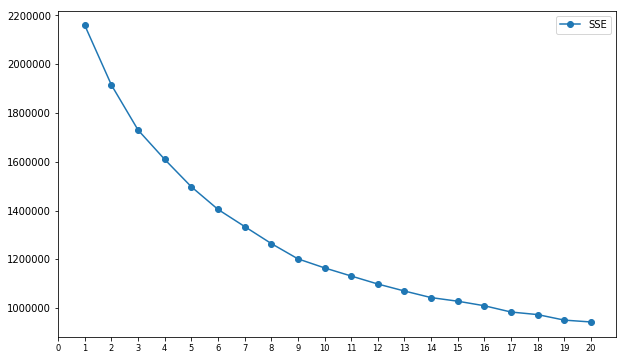

In [8]:
plt.figure(figsize=(10,6));
plt.plot(SSE_array, "o-", label="SSE")
plt.xticks(range(len(t)), t, size='small')
plt.legend()
plt.show()

# Zad
wykonaj algorytm dla $k=10$ i wypisz:
  * wszystkie miary dopasowania
  * crosstab

In [9]:
km = KMeans(n_clusters=10, n_init=10)
y_km = km.fit_predict(X)

In [10]:
pd.crosstab(y,y_km)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,0,0,0,177,0,0,1,0,0,0
1,0,0,24,0,99,1,0,2,1,55
2,2,3,148,1,8,13,0,0,0,2
3,12,7,0,0,7,155,0,0,2,0
4,0,9,0,0,3,0,164,0,0,5
5,42,0,0,0,0,1,2,1,136,0
6,0,0,0,1,2,0,0,177,0,1
7,0,175,0,0,2,0,0,0,0,2
8,50,5,3,0,102,2,0,2,4,6


In [11]:
print(metrics.adjusted_rand_score(y, y_km))
print(metrics.adjusted_mutual_info_score(y,  y_km))

0.669474889996699
0.7379708189788886


# Zad.

Zwizualizuj wyniki grupowania w 2D za pomocą

* PCA
* t-SNE

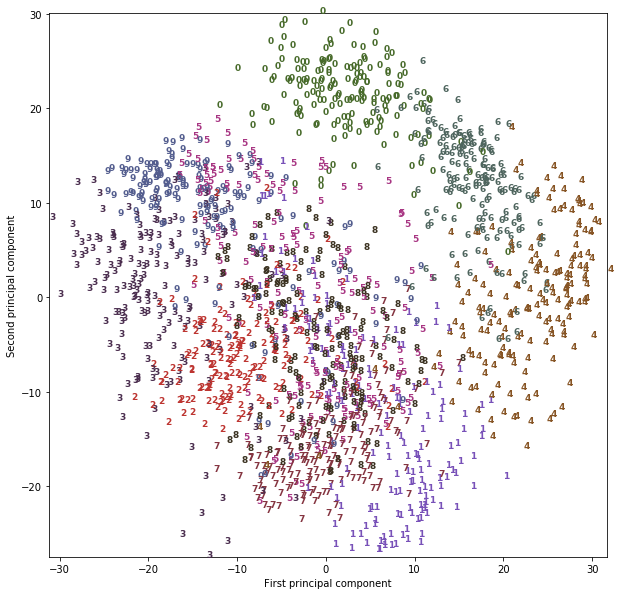

In [12]:
from sklearn.decomposition import PCA
from matplotlib import colors as mcolors

# build a PCA model
pca = PCA(n_components=2)
pca.fit(X)
# transform the digits data onto the first two principal components
X_pca = pca.transform(X)
#colors = list(mcolors.CSS4_COLORS)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(X_pca[:, 0].min(), X_pca[:, 0].max())
plt.ylim(X_pca[:, 1].min(), X_pca[:, 1].max())
for i in range(len(X)):
    # actually plot the digits as text instead of using scatter
    plt.text(X_pca[i, 0], X_pca[i, 1], str(y[i]),
             color = colors[y[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

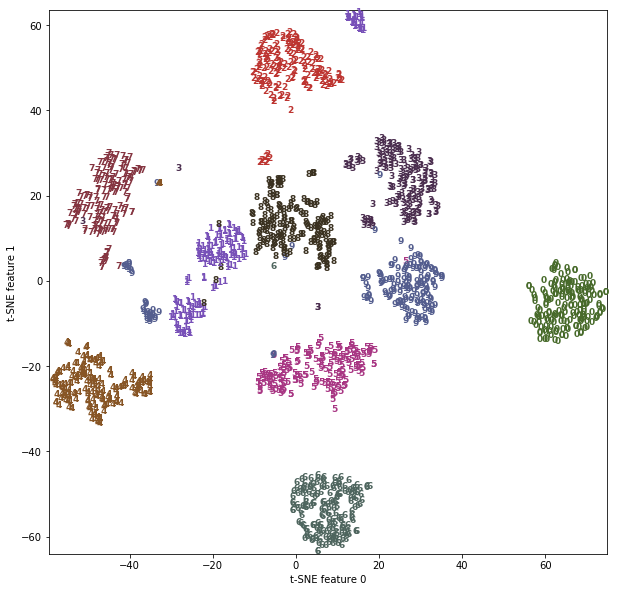

In [13]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max() + 1)
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max() + 1)
for i in range(len(X)):
    # actually plot the digits as text instead of using scatter
    plt.text(X_tsne[i, 0], X_tsne[i, 1], str(y[i]),
             color = colors[y[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.show()

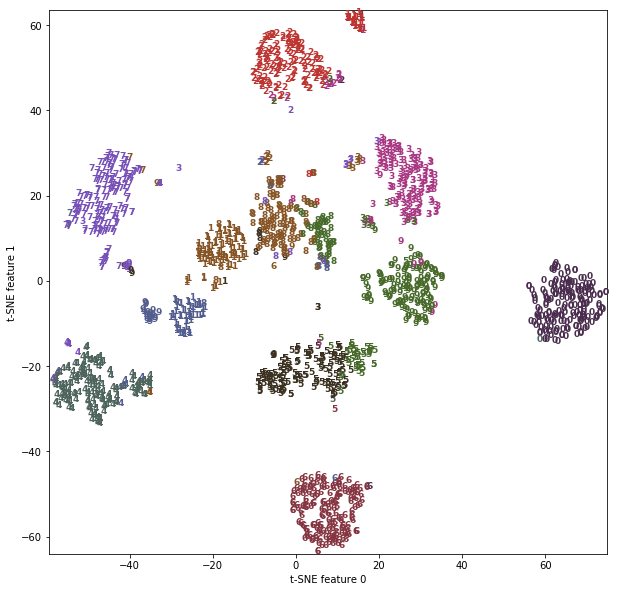

In [17]:
plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max() + 1)
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max() + 1)
for i in range(len(X)):
    # actually plot the digits as text instead of using scatter
    plt.text(X_tsne[i, 0], X_tsne[i, 1], str(y[i]),
             color = colors[y_km[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.show()

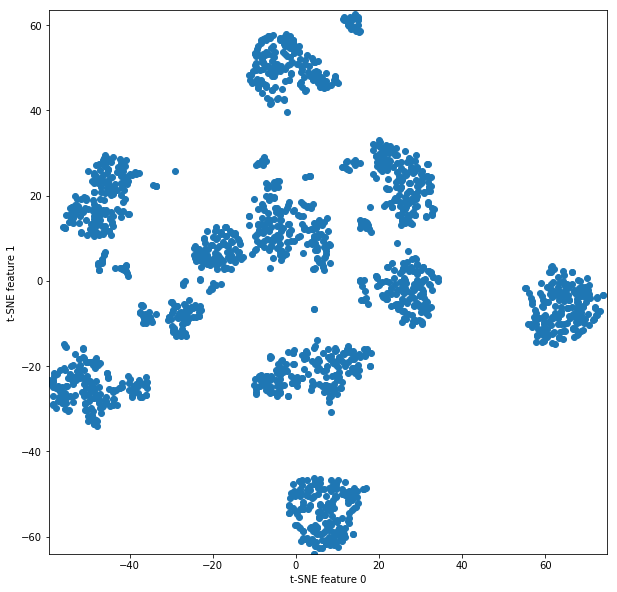

In [16]:
plt.figure(figsize=(10, 10))
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max() + 1)
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max() + 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")
plt.show()